#  BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

# Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

 # You are provided with following 2 files:

# 1.   train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
# 2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign

# Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
#  import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


#  This is the main dataset with features and label so first we  analyse this dataset 

In [3]:
train_data.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12261,31926,41,blue-collar,married,primary,no,3658,yes,no,cellular,9,apr,268,1,330,1,failure,no
13471,3985,30,services,single,secondary,no,442,yes,no,unknown,16,may,283,3,-1,0,unknown,no
21684,16042,50,management,married,secondary,no,-1,no,no,cellular,22,jul,139,1,-1,0,unknown,no
7853,37013,40,management,married,tertiary,no,964,yes,no,telephone,13,may,95,3,-1,0,unknown,no
19397,35633,57,management,divorced,tertiary,no,52,yes,no,cellular,8,may,40,3,359,8,other,no
5032,13080,56,retired,married,tertiary,no,87,no,no,cellular,8,jul,136,2,-1,0,unknown,no
9327,22003,30,technician,single,secondary,no,790,no,no,cellular,20,aug,696,3,-1,0,unknown,no
21440,43683,24,technician,single,secondary,no,598,no,no,cellular,12,may,762,1,182,2,success,yes
6787,5348,36,blue-collar,married,secondary,no,222,yes,no,unknown,23,may,188,1,-1,0,unknown,no
16054,9895,37,unknown,married,unknown,no,1699,no,no,unknown,9,jun,63,1,-1,0,unknown,no


#  This is the random data to give a what type of data in this dataset

In [4]:
train_data.duplicated().sum()

0

#  There is no duplicate value present in the dataset

In [5]:
train_data.shape

(31647, 18)

#  31647 rows and 18 columns present in the dataset

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


#  day and month has int and object dtype we have to change in datetime dtpe

In [7]:
for i in train_data.columns:
    print (train_data[i].value_counts())

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

#  Id column is just a number to each person so we drop this column

In [8]:
train_data.drop(columns='ID',axis=1,inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [10]:
train_data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# There is no null values present in the dataset 

In [11]:
subscriber =train_data[train_data['subscribed'].isin(['yes'])]
subscriber

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
6,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
10,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,yes
18,44,blue-collar,married,primary,no,4031,yes,no,cellular,7,may,983,4,-1,0,unknown,yes
23,39,management,married,tertiary,no,285,yes,no,cellular,15,jul,838,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31611,65,management,divorced,tertiary,no,90,yes,no,cellular,22,apr,416,1,-1,0,unknown,yes
31622,79,retired,divorced,primary,no,2787,no,no,telephone,13,jul,617,1,377,1,success,yes
31632,33,blue-collar,married,secondary,no,0,yes,no,unknown,21,may,521,3,-1,0,unknown,yes
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes


In [12]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 
There is 31647 data to each columns it means there is no null values in the dataset

as per the statistics information all columns is left skew

#  EDA

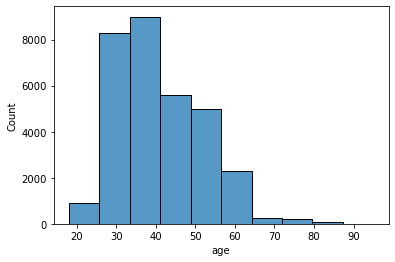

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

In [13]:
sns.histplot(data=train_data['age'],bins=10)
plt.show()
train_data['age'].value_counts()

#  There is most of the data age column is range 30 to 50 age 

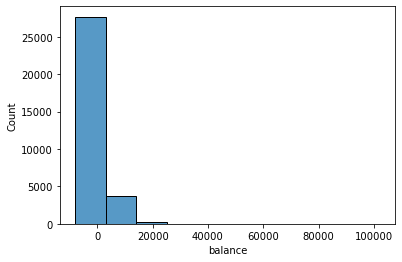

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

In [14]:
sns.histplot(data=train_data['balance'],bins=10)
plt.show()
train_data['balance'].value_counts()

#  There is most of the data has very less balace  in the bank accounts

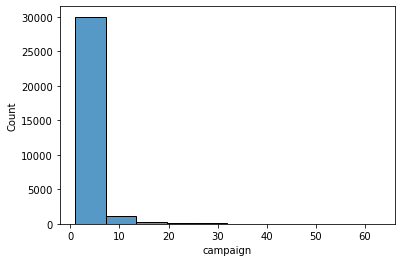

1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: campaign, dtype: int64

In [15]:
sns.histplot(data=train_data['campaign'],bins=10)
plt.show()
train_data['campaign'].value_counts()

#  There is most of the data has range 0 to 10

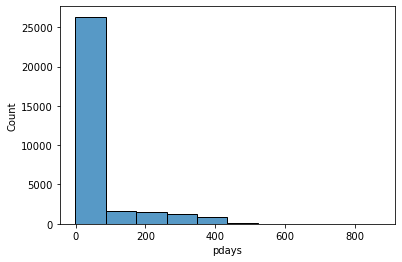

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64

In [16]:
sns.histplot(data=train_data['pdays'],bins=10)
plt.show()
train_data['pdays'].value_counts()

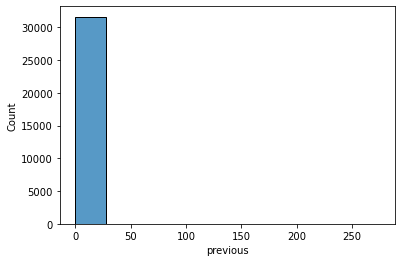

0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: previous, dtype: int64

In [17]:
sns.histplot(data=train_data['previous'],bins=10)
plt.show()
train_data['previous'].value_counts()

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

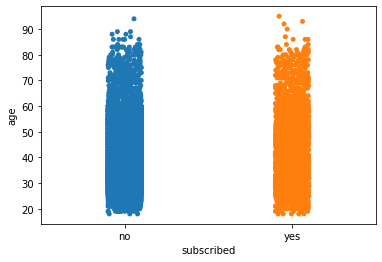

In [18]:
sns.stripplot(x='subscribed',y= 'age' ,data = train_data)
train_data['balance'].value_counts()

#  There is a equal age ratio to subscribed and not subscribed

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

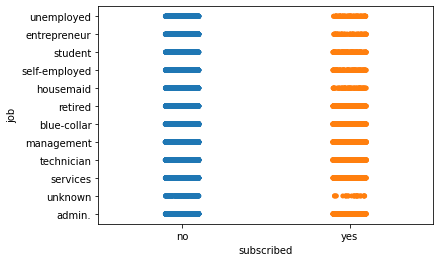

In [19]:
sns.stripplot(x='subscribed',y= 'job' ,data = train_data)
train_data['balance'].value_counts()

#  There is a equal job ratio to subscribed and not subscribed

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

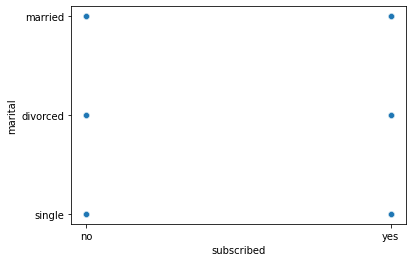

In [20]:
sns.scatterplot(x='subscribed',y= 'marital' ,data = train_data)
train_data['balance'].value_counts()

# There is a equal marital status to subscribed or not

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

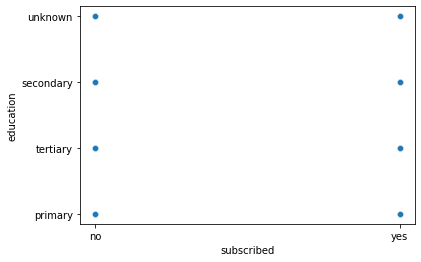

In [21]:
sns.scatterplot(x='subscribed',y= 'education' ,data = train_data)
train_data['balance'].value_counts()

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

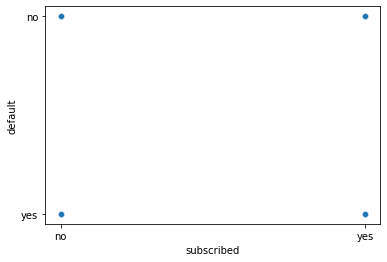

In [22]:
sns.scatterplot(x='subscribed',y= 'default' ,data = train_data)
train_data['balance'].value_counts()

#  the customer has default or not his also subscribed the term deposits

In [23]:
month_subsciber =pd.crosstab(train_data['month'],train_data['subscribed'],margins=True)
month_subsciber 

subscribed,no,yes,All
month,,,
apr,1671,384,2055
aug,3813,520,4333
dec,85,72,157
feb,1522,305,1827
jan,880,97,977
jul,4403,441,4844
jun,3355,383,3738
mar,168,174,342
may,9020,649,9669


#  may month there is the highest subscriber rate

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

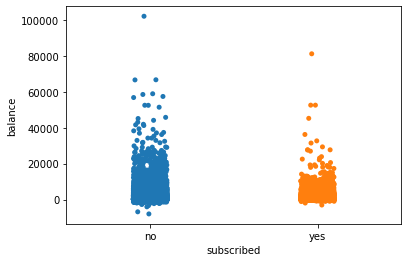

In [24]:
sns.stripplot(x='subscribed',y= 'balance' ,data = train_data)
train_data['balance'].value_counts()

#  the balance is low there is high chances to subsribed the term deposits
# OR they might be chances they subscribe term deposits thatswhy the balance is low

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

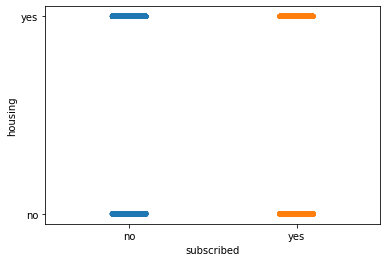

In [25]:
sns.stripplot(x='subscribed',y= 'housing' ,data = train_data)
train_data['balance'].value_counts()

#  There is no effect of customer has housing or not to subscribed the term deposits

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

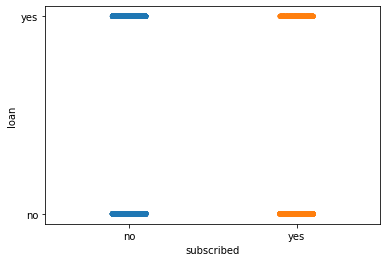

In [26]:
sns.stripplot(x='subscribed',y= 'loan' ,data = train_data)
train_data['balance'].value_counts()

#  Customer has loan or not there is no effect to subscribed or not 

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

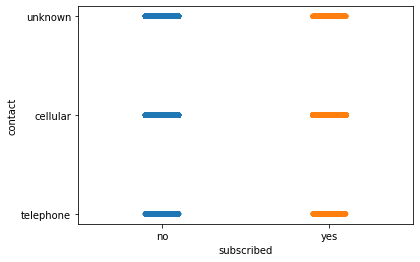

In [27]:
sns.stripplot(x='subscribed',y= 'contact' ,data = train_data)
train_data['contact'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

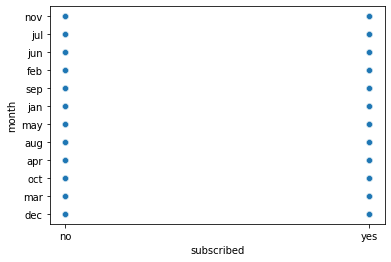

In [28]:
sns.scatterplot(x='subscribed',y= 'month' ,data = train_data)
train_data['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

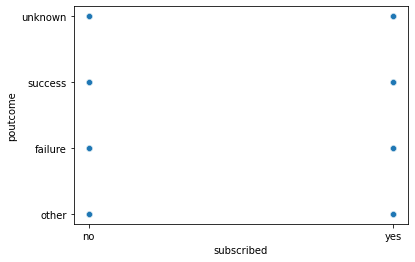

In [29]:
sns.scatterplot(x='subscribed',y= 'poutcome' ,data = train_data)
train_data['month'].value_counts()

#    There is no effect to contact details to subscribed  or not

#  let's get deep analysis

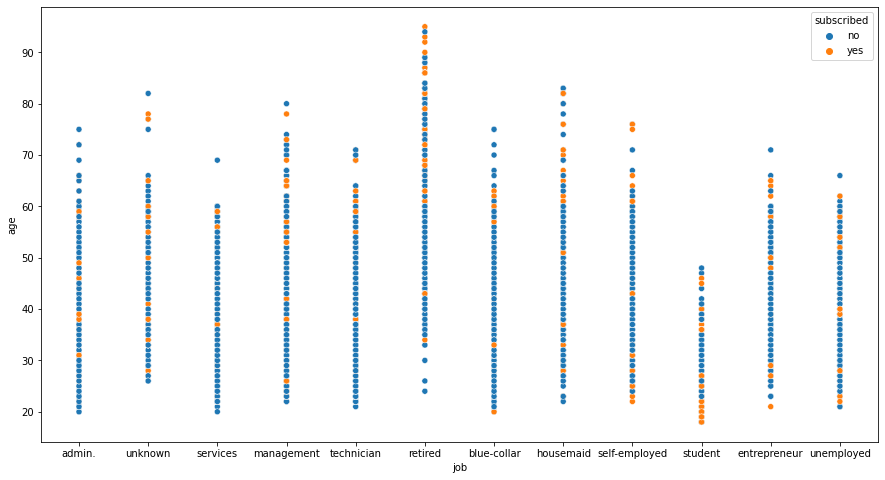

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='job',y= 'age' , hue= 'subscribed', data = train_data)
plt.show()

#  
As per above visiluations the age above 60 there is high chances to subscibed term deposits

the below age is 20 there is high chances the student will be subscibed the term deposits



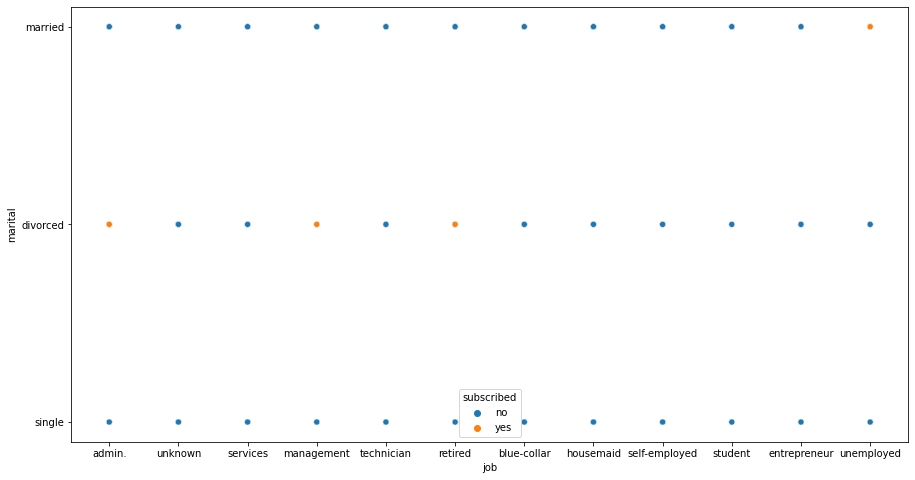

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='job',y= 'marital' , hue= 'subscribed', data = train_data)
plt.show()

#  
the customers are marital status is married when the are unemployed that time subscibed the term deposits

the customers are marital status is divorced and the job is admin ,managegment or retired there is chances to subscibed 

and a single status there is no chances to subscibed 

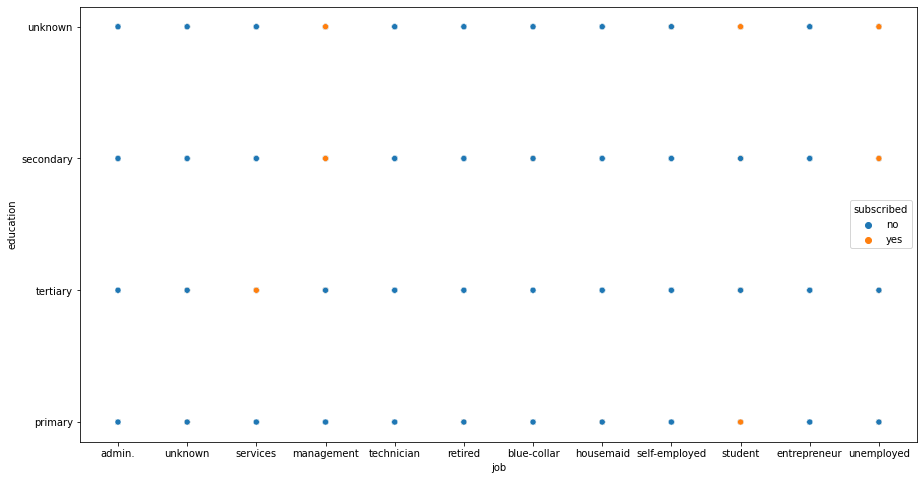

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='job',y= 'education' , hue= 'subscribed', data = train_data)
plt.show()

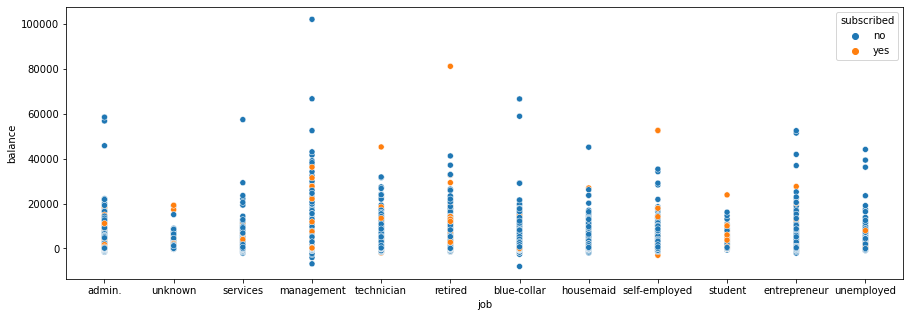

In [33]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='job',y= 'balance' , hue= 'subscribed', data = train_data)
plt.show()

#  management and student has high chances to subscribed the term deposits


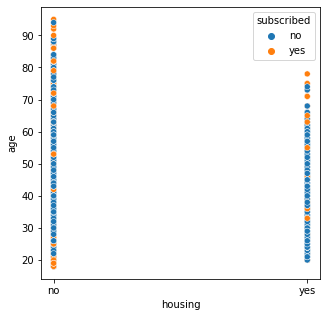

In [34]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='housing',y= 'age' , hue= 'subscribed', data = train_data)
plt.show()

#  who's have not a house there is a high chances to subscribed term deposits for secure the future

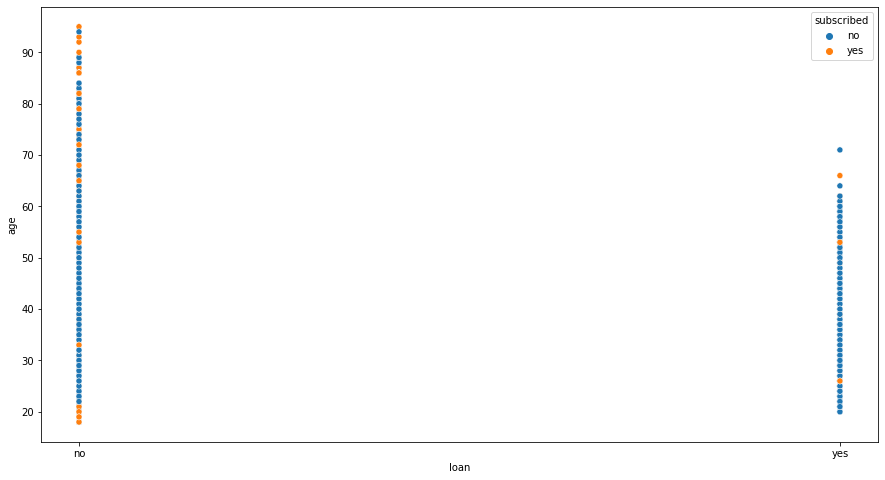

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='loan',y= 'age' , hue= 'subscribed', data = train_data)
plt.show()

# 
who's not taking a loan there is a chances to subscribed a term deposits

and who's taking a loan there is main prority is finish the loan 

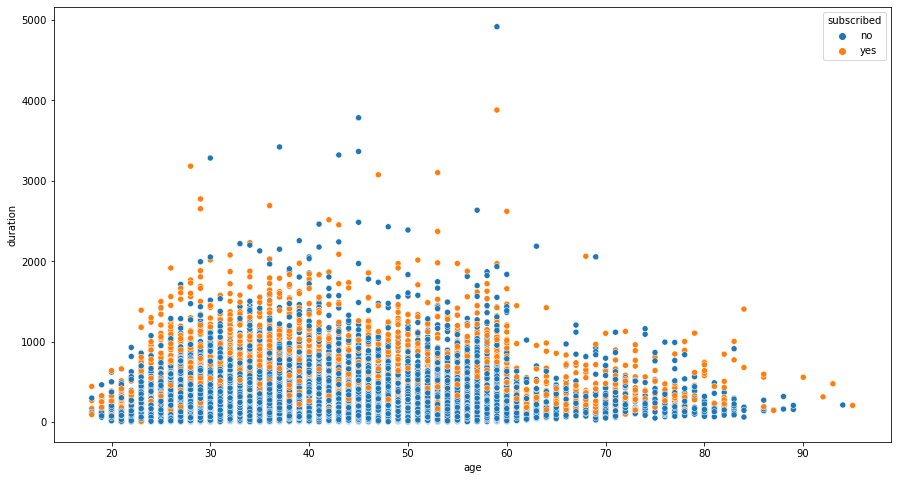

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age',y= 'duration' , hue= 'subscribed', data = train_data)
plt.show()

#  As the the visualize we  observed two things
1 -when the age is greter than 60 so duration is not matter to subscribed the term deposits

2- but where the age is below 60 then duration is matter to subscribed the term deposits


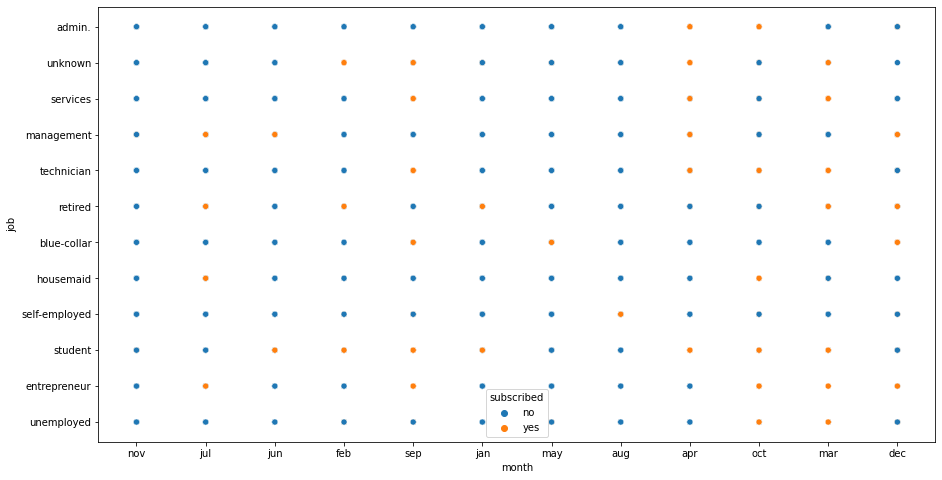

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='month',y= 'job',hue= 'subscribed' , data = train_data)
plt.show()

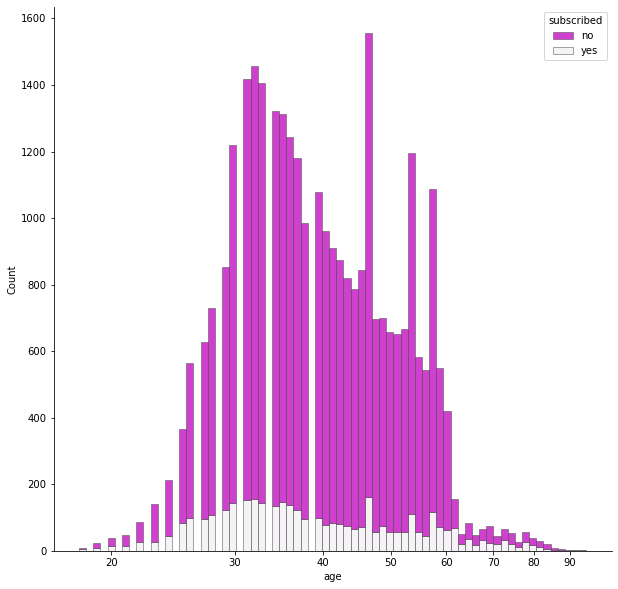

In [38]:
import matplotlib as mpl
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f)

sns.histplot(
    train_data,
    x="age",hue="subscribed",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(range(20,100,10))
plt.show()

# 
As per the above visiluation we can see the age group subscribed the term deposits

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [40]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


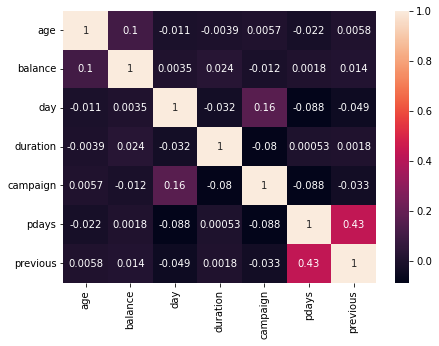

In [41]:
plt.figure(figsize=(7,5))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

#  THERE IS NO CO-RELATION IN THE DATASET

In [42]:
categorial_data=[]
for i in train_data.dtypes.index:
    if train_data.dtypes[i]=='object':
        categorial_data.append(i)
numerical_data=[]
for i in train_data.dtypes.index:
    if train_data.dtypes[i] !='object':
        numerical_data.append(i)

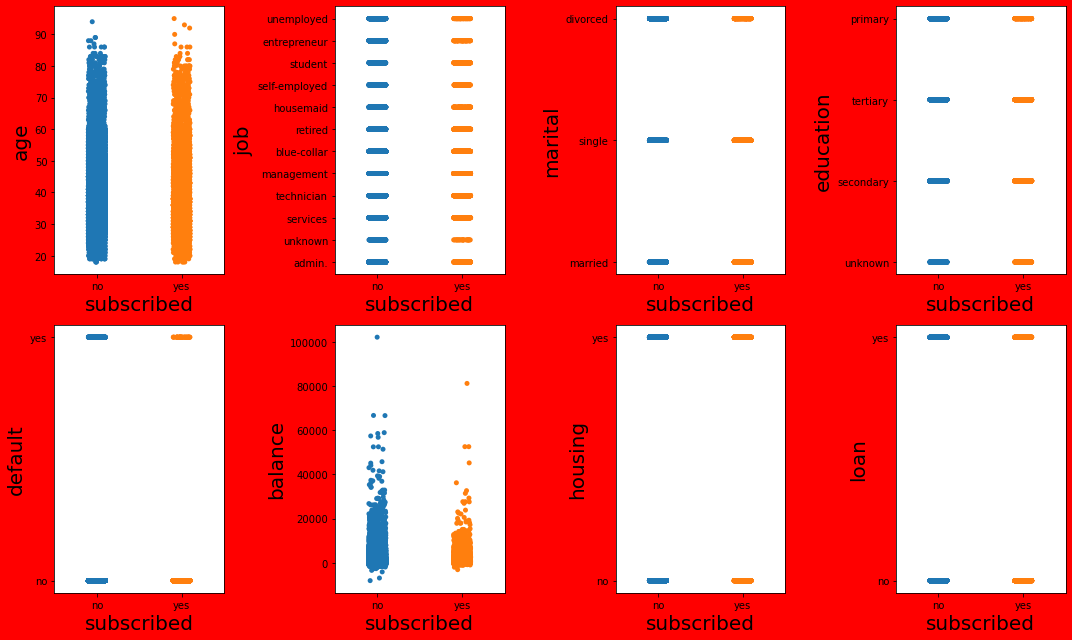

In [43]:
plt.figure(figsize=(15, 9), facecolor='red')
plotnumber = 1
for column in train_data.columns:
    if plotnumber <= 8:  
        ax =  plt.subplot(2, 4, plotnumber)  
        sns.stripplot(data=train_data, x=train_data['subscribed'], y=column)  
        plt.xlabel('subscribed', fontsize=20)
        plt.ylabel(column, fontsize=20)

    plotnumber += 1

plt.tight_layout()
plt.show()

# 

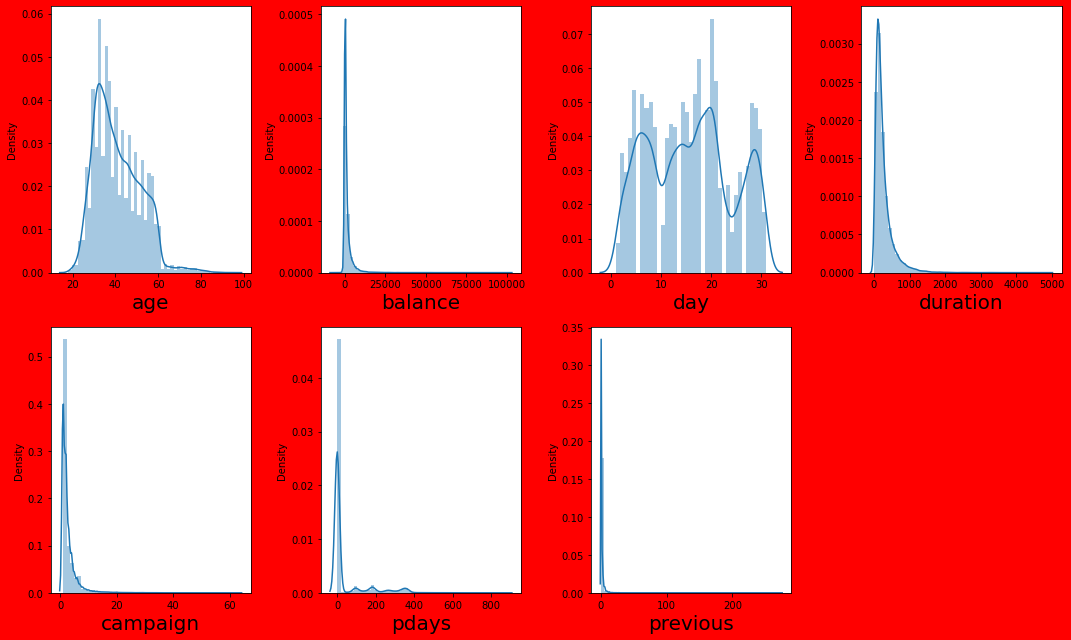

In [44]:
plt.figure(figsize=(15,9),facecolor='red')
plotnumber=1
for column in numerical_data:
    if plotnumber<=8:  
        ax=plt.subplot(2,4,plotnumber)  
        sns.distplot(train_data[column])  
        plt.xlabel (column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

# 
age and day column is closed to normal distribution

balance duraration campaign pdays and previous is left skew

In [45]:
train_data.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

#  Encoding

In [46]:
from sklearn. preprocessing import LabelEncoder

In [47]:
label_encoder = LabelEncoder()

train_data['job'] = label_encoder.fit_transform(train_data['job'])
train_data['marital'] = label_encoder.fit_transform(train_data['marital'])
train_data['education'] = label_encoder.fit_transform(train_data['education'])
train_data['default'] = label_encoder.fit_transform(train_data['default'])
train_data['housing'] = label_encoder.fit_transform(train_data['housing'])
train_data['loan'] = label_encoder.fit_transform(train_data['loan'])
train_data['contact'] = label_encoder.fit_transform(train_data['contact'])
train_data['month'] = label_encoder.fit_transform(train_data['month'])
train_data['poutcome'] = label_encoder.fit_transform(train_data['poutcome'])
train_data['subscribed'] = label_encoder.fit_transform(train_data['subscribed'])

In [48]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [49]:
x=train_data.drop(columns='subscribed')
y=train_data['subscribed']

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(31647, 16)

In [51]:
threshold=3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))


In [52]:
train_data_1=train_data[(z<3).all(axis=1)]
print(train_data_1.shape)
print(train_data.shape)

(27584, 17)
(31647, 17)


In [53]:
y[(z<3).all(axis=1)]
print(y.shape)

(31647,)


In [54]:
loss_percent = (31647-27584)/31647*100
loss_percent

12.83849969981357

#  Using z score techniques for remove outliers we loss 12 percent of data
# we try another techniques to try to save data loss

#  yeo-johnson technique to remove outliers

In [55]:
from sklearn.preprocessing import power_transform

In [56]:
# yeo-johnson by default method
x= (power_transform(x))
x

array([[ 1.34138189, -1.61003975, -0.28558787, ..., -0.46969565,
        -0.46967334,  0.46699292],
       [-0.9663778 ,  1.6528723 , -0.28558787, ..., -0.46969565,
        -0.46967334,  0.46699292],
       [-1.53815285,  0.8592082 , -0.28558787, ..., -0.46969565,
        -0.46967334,  0.46699292],
       ...,
       [-0.83671116,  0.09593561,  1.38236283, ..., -0.46969565,
        -0.46967334,  0.46699292],
       [ 1.40695494,  1.27892758, -0.28558787, ...,  2.15084394,
         2.18608335, -2.25871136],
       [ 1.27441963,  0.09593561, -1.89535557, ..., -0.46969565,
        -0.46967334,  0.46699292]])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [58]:
x.shape

(31647, 16)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 300):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)
 

Best accuracy is 0.9125855713533438 at random_state 154


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)

In [61]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [62]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.9048973143759874


[[8250  187]
 [ 716  342]]


In [63]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.9138493944181147


[[8205  232]
 [ 586  472]]


In [64]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.9060558188520274


[[8265  172]
 [ 720  338]]


In [65]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.9026856240126382


[[8343   94]
 [ 830  228]]


In [66]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.910057925223802


[[8220  217]
 [ 637  421]]


In [67]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.903001579778831


[[8186  251]
 [ 670  388]]


In [68]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.9044760400210637


[[8160  277]
 [ 630  428]]


#  All algorithm accuracy score is 90 to 91 percent

#  Cross Validation Score

In [69]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.89763033 0.90315956 0.89745615 0.89729815 0.89682414]
0.8984736675655107
Difference between Accuracy score  and cross validation score is -  0.006423646810476691


In [70]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.90679305 0.90537125 0.90282825 0.90630431 0.90219624]
0.904698620183378
Difference between Accuracy score  and cross validation score is -  0.009150774234736758


In [71]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.8971564  0.89921011 0.89366409 0.89777216 0.89903618]
0.8973677874384993
Difference between Accuracy score  and cross validation score is -  0.005317836574138868


In [72]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.9056872  0.90410742 0.90172223 0.90267025 0.90219624]
0.9032766694697818
Difference between Accuracy score  and cross validation score is -  0.006781255754020221


In [73]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.89383886 0.89810427 0.89208406 0.89729815 0.89619213]
0.8955034936600423
Difference between Accuracy score  and cross validation score is -  0.0074980861187886605


# gradient booster is the 90 per accuracy and cross validation difference 0.7 percent 

#  Test data preprocessing

In [75]:
test_data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [76]:
test_data.drop(columns='ID',inplace=True)

In [79]:
label_encoder = LabelEncoder()

test_data['job'] = label_encoder.fit_transform(test_data['job'])
test_data['marital'] = label_encoder.fit_transform(test_data['marital'])
test_data['education'] = label_encoder.fit_transform(test_data['education'])
test_data['default'] = label_encoder.fit_transform(test_data['default'])
test_data['housing'] = label_encoder.fit_transform(test_data['housing'])
test_data['loan'] = label_encoder.fit_transform(test_data['loan'])
test_data['contact'] = label_encoder.fit_transform(test_data['contact'])
test_data['month'] = label_encoder.fit_transform(test_data['month'])
test_data['poutcome'] = label_encoder.fit_transform(test_data['poutcome'])

In [ ]:
predgbc =gbc.predict (test_data)

In [86]:
test_data['subscribed']=predgbc

In [87]:
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,1
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3,0
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3,1
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3,1
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3,0
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3,1
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3,1
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2,1


# This is the predicting dataset

In [101]:
test_data_subscriber = test_data[test_data['subscribed'].isin([1])]

In [102]:
test_data_subscriber

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,1
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3,1
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3,1
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3,1
5,32,4,2,2,0,0,1,0,0,22,5,455,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,32,9,2,1,0,129,1,0,0,7,8,213,1,-1,0,3,1
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3,1
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3,1
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2,1


#  This is the subscriber data so it will help  our bank